# Outline
1. import data
2. Pembuatan Peubah Dummy
3. Pembagian data (training testing)
4. Modeling
5. Prediksi Data Test

## 1. Import Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
datatree_label = pd.read_csv('datatree_label.csv')
datatree_nolabel = pd.read_csv('datatree_nolabel.csv') 

In [4]:
datatree_label.head()

,ID Nasabah,Jenis Kelamin,Single,Tinggal di Kota,usia,Perokok,Budget,Kesukaan,Tertarik Beli?
0,609,1,1,0,39,0,medium,Tekno,1
1,424,1,1,0,39,0,medium,Tekno,1
2,983,0,1,1,39,0,low,Seni,0
3,520,1,1,0,32,1,low,Seni,1
4,868,1,1,0,38,0,low,Tekno,0


In [5]:
datatree_nolabel.head()

,ID Nasabah,Jenis Kelamin,Single,Tinggal di Kota,usia,Perokok,Budget,Kesukaan
0,436,1,1,1,34,0,medium,Busana
1,403,0,1,0,33,0,low,Tekno
2,119,0,1,0,38,1,low,Tekno
3,565,1,1,1,32,0,medium,Seni
4,281,0,0,0,29,0,low,Tekno


## 2. Pembuatan Pubah dummy

samakan struktur

In [6]:
datatree_nolabel['Tertarik Beli?'] = 9999

In [7]:
datatree_nolabel.head()

,ID Nasabah,Jenis Kelamin,Single,Tinggal di Kota,usia,Perokok,Budget,Kesukaan,Tertarik Beli?
0,436,1,1,1,34,0,medium,Busana,9999
1,403,0,1,0,33,0,low,Tekno,9999
2,119,0,1,0,38,1,low,Tekno,9999
3,565,1,1,1,32,0,medium,Seni,9999
4,281,0,0,0,29,0,low,Tekno,9999


gabungkan kedua data

In [8]:
datatree = datatree_label.append(datatree_nolabel)

In [9]:
datatree.tail()

,ID Nasabah,Jenis Kelamin,Single,Tinggal di Kota,usia,Perokok,Budget,Kesukaan,Tertarik Beli?
104,960,0,1,1,28,0,medium,Busana,9999
105,501,1,1,0,39,0,low,Lainnya,9999
106,231,0,1,0,34,0,high,Seni,9999
107,292,1,1,0,35,0,medium,Tekno,9999
108,481,1,1,0,37,0,low,Seni,9999


pendefinisian data

In [10]:
## definisikan nilai-nilai pada peubah
datatree['Jenis Kelamin'] = datatree['Jenis Kelamin'].map({1:'Laki-Laki',
                                                           0:'Perempuan'})
datatree['Single'] = datatree['Single'].map({1:'Single',
                                             0:'Tidak Single'})
datatree['Tinggal di Kota'] = datatree['Tinggal di Kota'].map({1:'Tinggal di kota',
                                                               0:'Tinggal di pedesaan'})
datatree['Perokok'] = datatree['Perokok'].map({1:'Perokok',
                                               0:'Bukan Perokok'})

### Eksplorasi Data

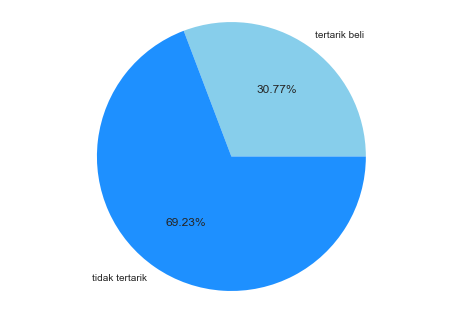

In [11]:
# library untuk eksplorasi data
import matplotlib.pyplot as plt
import seaborn as sns

# menghitung ukuran diagram pie
size = [sum(datatree_label['Tertarik Beli?']),
        len(datatree_label['Tertarik Beli?'])-sum(datatree_label['Tertarik Beli?'])]

labels = ['tertarik beli','tidak tertarik']

# memilih warna
color = ["skyblue","dodgerblue"]

# diagram pie 
plt.pie(size,labels=labels,colors=color,autopct='%2.2f%%')

plt.axis('equal')
plt.show()

In [12]:
datatree.head()

,ID Nasabah,Jenis Kelamin,Single,Tinggal di Kota,usia,Perokok,Budget,Kesukaan,Tertarik Beli?
0,609,Laki-Laki,Single,Tinggal di pedesaan,39,Bukan Perokok,medium,Tekno,1
1,424,Laki-Laki,Single,Tinggal di pedesaan,39,Bukan Perokok,medium,Tekno,1
2,983,Perempuan,Single,Tinggal di kota,39,Bukan Perokok,low,Seni,0
3,520,Laki-Laki,Single,Tinggal di pedesaan,32,Perokok,low,Seni,1
4,868,Laki-Laki,Single,Tinggal di pedesaan,38,Bukan Perokok,low,Tekno,0


pembuatan dummy

In [13]:
print("peubah awal:\n", list(datatree),"\n")

peubah awal:
 ['ID Nasabah', 'Jenis Kelamin', 'Single', 'Tinggal di Kota', 'usia', 'Perokok', 'Budget', 'Kesukaan', 'Tertarik Beli?'] 



In [14]:
peubah = list(datatree)[1:4]+list(datatree)[5:8]
peubah

['Jenis Kelamin', 'Single', 'Tinggal di Kota', 'Perokok', 'Budget', 'Kesukaan']

In [15]:
# pembuatan peubah boneka secara otomatis untuk semua peubah kategorik
datatree_dummies = pd.get_dummies(datatree,drop_first=True,columns=peubah)
print("peubah setelah dummy dibuat:\n", list(datatree_dummies),"\n")

peubah setelah dummy dibuat:
 ['ID Nasabah', 'usia', 'Tertarik Beli?', 'Jenis Kelamin_Perempuan', 'Single_Tidak Single', 'Tinggal di Kota_Tinggal di pedesaan', 'Perokok_Perokok', 'Budget_low', 'Budget_medium', 'Kesukaan_Lainnya', 'Kesukaan_Seni', 'Kesukaan_Tekno'] 



pemisahan kembali

In [16]:
datatree_label = datatree_dummies[datatree_dummies['Tertarik Beli?'] != 9999]
datatree_nolabel = datatree_dummies[datatree_dummies['Tertarik Beli?'] == 9999]

In [17]:
datatree_label.head()

,ID Nasabah,usia,Tertarik Beli?,Jenis Kelamin_Perempuan,Single_Tidak Single,Tinggal di Kota_Tinggal di pedesaan,Perokok_Perokok,Budget_low,Budget_medium,Kesukaan_Lainnya,Kesukaan_Seni,Kesukaan_Tekno
0,609,39,1,0,0,1,0,0,1,0,0,1
1,424,39,1,0,0,1,0,0,1,0,0,1
2,983,39,0,1,0,0,0,1,0,0,1,0
3,520,32,1,0,0,1,1,1,0,0,1,0
4,868,38,0,0,0,1,0,1,0,0,0,1


In [18]:
datatree_nolabel.head()

,ID Nasabah,usia,Tertarik Beli?,Jenis Kelamin_Perempuan,Single_Tidak Single,Tinggal di Kota_Tinggal di pedesaan,Perokok_Perokok,Budget_low,Budget_medium,Kesukaan_Lainnya,Kesukaan_Seni,Kesukaan_Tekno
0,436,34,9999,0,0,0,0,0,1,0,0,0
1,403,33,9999,1,0,1,0,1,0,0,0,1
2,119,38,9999,1,0,1,1,1,0,0,0,1
3,565,32,9999,0,0,0,0,0,1,0,1,0
4,281,29,9999,1,1,1,0,1,0,0,0,1


## 3. Pembagian data

In [19]:
peubah_penjelas = list(datatree_dummies)[3:]+['usia']
peubah_penjelas

['Jenis Kelamin_Perempuan',
 'Single_Tidak Single',
 'Tinggal di Kota_Tinggal di pedesaan',
 'Perokok_Perokok',
 'Budget_low',
 'Budget_medium',
 'Kesukaan_Lainnya',
 'Kesukaan_Seni',
 'Kesukaan_Tekno',
 'usia']

In [20]:
y = datatree_label['Tertarik Beli?']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(datatree_label[peubah_penjelas],y)

In [23]:
print('dimensi data train :',X_train.shape)
print('dimensi data test :',X_test.shape)

dimensi data train : (731, 10)
dimensi data test : (244, 10)


## 4. Modeling

### a. Regresi Logistik

In [24]:
import statsmodels.api as sm

logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.174085
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         Tertarik Beli?   No. Observations:                  731
Model:                          Logit   Df Residuals:                      721
Method:                           MLE   Df Model:                            9
Date:                Sat, 02 Mar 2019   Pseudo R-squ.:                  0.7237
Time:                        00:26:50   Log-Likelihood:                -127.26
converged:                       True   LL-Null:                       -460.53
                                        LLR p-value:                1.067e-137
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Jenis Kelamin_Perempuan                -6.9190      0.785

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logreg = LogisticRegression()

In [27]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
# akurasi data test
logreg.score(X_test,y_test)

0.93442622950819676

In [29]:
# akurasi data train
logreg.score(X_train,y_train)

0.92339261285909713

In [30]:
# library untuk menghitung skor validasi silang
from sklearn.model_selection import cross_val_score

# library untuk melakukan validasi silang secara berstrata
from sklearn.model_selection import StratifiedKFold

In [31]:
skfold = StratifiedKFold(n_splits = 5)
logreg_cv = cross_val_score(logreg, X_train,y_train,cv=skfold)

In [32]:
print("Skor CV : \n",logreg_cv)
print("Rata-rata Skor CV : \n",logreg_cv.mean())

Skor CV : 
 [ 0.95238095  0.89795918  0.9109589   0.90410959  0.93793103]
Rata-rata Skor CV : 
 0.920667932738


In [33]:
def eval(alg):
    alg.fit(X_train,y_train)
    print("Skore test : \n",alg.score(X_test,y_test),"\n")
    print("Skore train : \n",alg.score(X_train,y_train),"\n")
    
    skfold = StratifiedKFold(n_splits = 5)
    
    alg_cv = cross_val_score(alg, X_train,y_train,cv=skfold)
    print("Skor CV : \n",alg_cv,"\n")
    print("Rata-rata Skor CV : \n",alg_cv.mean(),"\n")

### b. Pohon Keputusan

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
tree = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 70)

In [36]:
eval(tree)

Skore test : 
 0.901639344262 

Skore train : 
 0.902872777018 

Skor CV : 
 [ 0.91156463  0.88435374  0.89041096  0.86986301  0.86206897] 

Rata-rata Skor CV : 
 0.883652261093 



In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=70, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

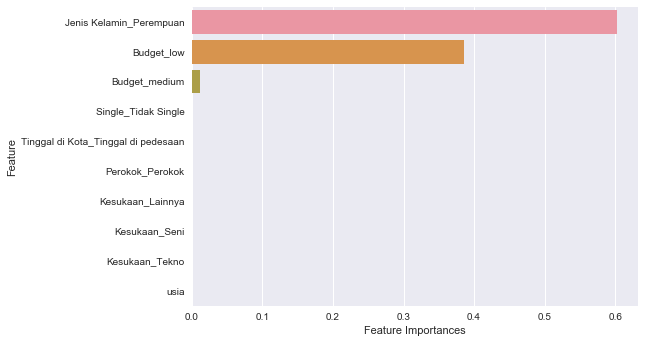

In [39]:
fitur_imp=pd.DataFrame({'fitur':list(X_train),'importances':tree.feature_importances_})
fitur_imp.sort_values(by='importances',ascending=False,inplace=True)

sns.barplot(x='importances',y='fitur',data=fitur_imp)
plt.xlabel("Feature Importances")
plt.ylabel("Feature")
plt.show()

In [40]:
import graphviz
from sklearn.tree import export_graphviz

In [41]:
export_graphviz(tree, out_file="tree.dot"
                ,class_names=["tidak tertarik", "tertarik"]
                ,feature_names = list(X_train)
                ,impurity=False
                ,filled=True)

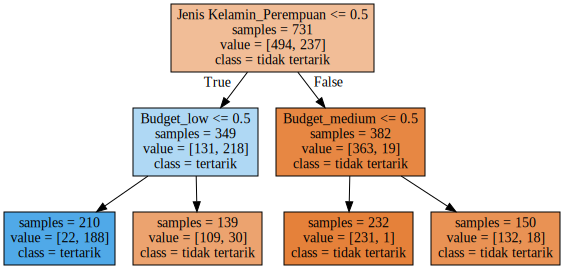

In [42]:
with open("tree.dot") as f:    
    dot_graph = f.read() 
graphviz.Source(dot_graph)

### c. Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier()

In [46]:
eval(rf)

Skore test : 
 0.905737704918 

Skore train : 
 0.979480164159 

Skor CV : 
 [ 0.9047619   0.9109589   0.88356164  0.89726027  0.87671233] 

Rata-rata Skor CV : 
 0.894651011089 



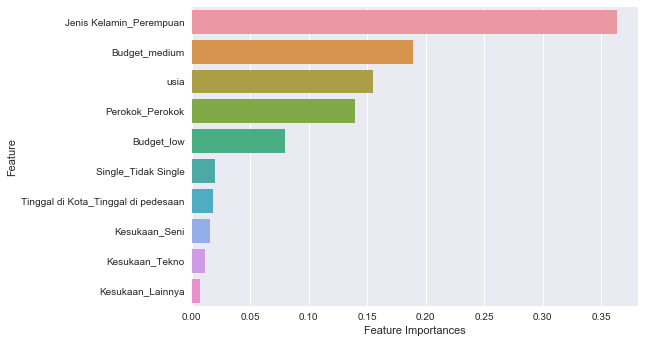

In [58]:
rf.fit(X_train,y_train)

fitur_imp=pd.DataFrame({'fitur':list(X_train),'importances':rf.feature_importances_})
fitur_imp.sort_values(by='importances',ascending=False,inplace=True)

sns.barplot(x='importances',y='fitur',data=fitur_imp)
plt.xlabel("Feature Importances")
plt.ylabel("Feature")
plt.show()

## 5. Submission

In [184]:
logreg.fit(datatree_label[peubah_penjelas],y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [186]:
datatree_nolabel['Tertarik Beli?'] = logreg.predict(datatree_nolabel[peubah_penjelas])

C:\Users\Muy\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [188]:
datatree_nolabel.head()

,ID Nasabah,usia,Tertarik Beli?,Jenis Kelamin_Perempuan,Single_Tidak Single,Tinggal di Kota_Tinggal di pedesaan,Perokok_Perokok,Budget_low,Budget_medium,Kesukaan_Lainnya,Kesukaan_Seni,Kesukaan_Tekno
0,436,34,1,0,0,0,0,0,1,0,0,0
1,403,33,0,1,0,1,0,1,0,0,0,1
2,119,38,0,1,0,1,1,1,0,0,0,1
3,565,32,1,0,0,0,0,0,1,0,1,0
4,281,29,0,1,1,1,0,1,0,0,0,1


In [190]:
sumbmission = datatree_nolabel[['ID Nasabah','Tertarik Beli?']]

In [191]:
sumbmission.head()

,ID Nasabah,Tertarik Beli?
0,436,1
1,403,0
2,119,0
3,565,1
4,281,0
